In [20]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
from matplotlib import pyplot as plt
from impl import *
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


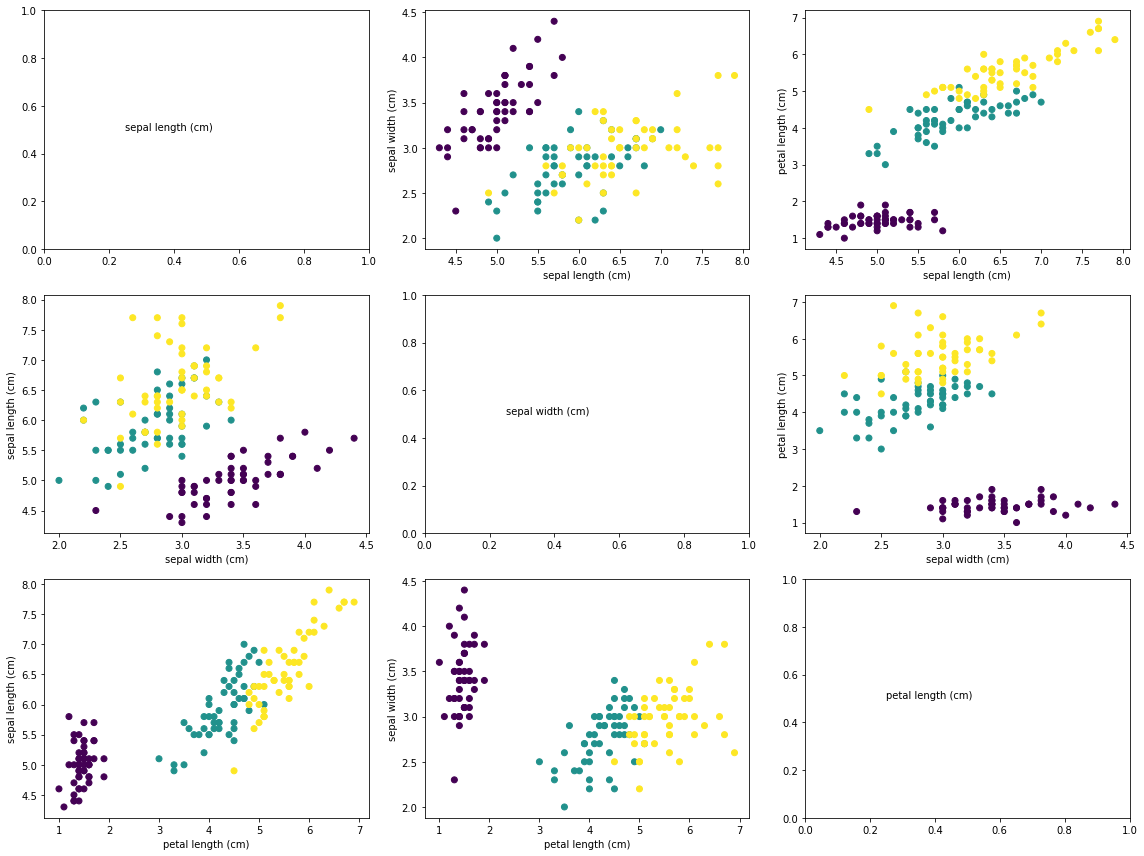

In [37]:
iris_ds = datasets.load_iris()
X = iris_ds.data
Y = iris_ds.target
plot_data(X, Y, (16, 12), f_names=iris_ds.feature_names)
plt.tight_layout()

In [39]:
classifier = PotentialFunctionClassifier(0.1)

classifier.fit(X, Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.5, random_state=10)

model = PotentialFunctionClassifier(0.5)
model.fit(train_x, train_y, 0.000005)
pred = model.predict(test_x)

print("Accuracy: ", metrics.accuracy_score(test_y, pred))


Accuracy:  0.9466666666666667


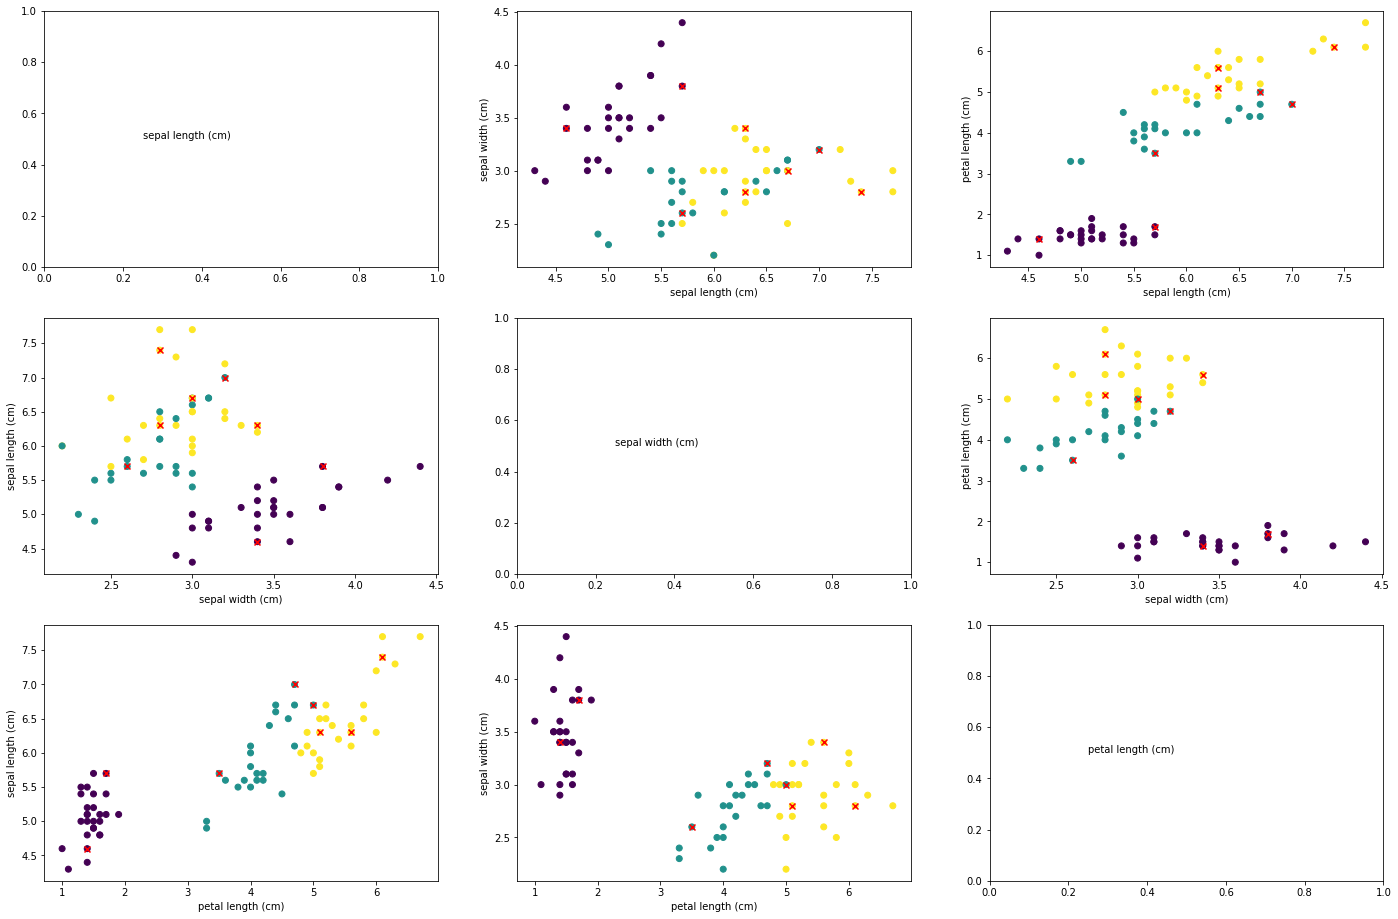

In [40]:
plot_data(train_x, train_y, (24, 16), indexes=model.indexes, f_names= iris_ds.feature_names)